In [ ]:
### A logistics regression analysis to investigate the failure of Barisan Nasional during General Election 14 associated with demography voter variable 
### Statistics descriptive of the data as per below:
## 1. Dot plot of the number of votes of the parties competing in the 14th GE by state
## 2. Scatter plot and regression line of proportions by ethnicity in Peninsular, Sabah and Sarawak Parliament
## 3. Map plot of felda parliment in Malaysia 
## 4. Pie chart of the status of the Barisan Nasional in the felda area
## 5. Pie chart of the winning status of the Barisan Nasional in the felda area
## 6. Bubble grid chart of urbanization by state
## 7. Waffle chart of the composition of Barisan Nasional results in rural, semi-urban and urban parliaments
### Modelling with logistic regression 
### Model adequacy checking

In [1]:
#Display the current working directory
getwd()

[1] "/home/jovyan"

In [2]:
#Run the library readr to read the data file in CSV format
library(readr)

In [3]:
#Import the data 
Result<- read_csv("/home/jovyan/Data csv/Result.csv")

New names:
• `` -> `...7`
Rows: 687 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): NEGERI, BAHAGIAN PILIHAN RAYA, NAMA CALON, PARTI, STATUS
lgl (1): ...7

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(Result)

NEGERI,BAHAGIAN PILIHAN RAYA,NAMA CALON,PARTI,BILANGAN UNDI,STATUS,...7
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>
JOHOR,P. 140 - SEGAMAT,SUBRAMANIAM A/L K.V SATHASIVAM,BN,18584,NA,NA
JOHOR,P. 140 - SEGAMAT,SANTHARA KUMAR A/L RAMANAIDU,PKR,24060,MENANG,NA
JOHOR,P. 140 - SEGAMAT,KHAIRUL FAIZI BIN AHMAD KAMIL,PAS,2676,HILANG DEPOSIT,NA
JOHOR,P. 141 - SEKIJANG,AYUB BIN RAHMAT,BN,18278,NA,NA
JOHOR,P. 141 - SEKIJANG,NATRAH BINTI ISMAIL,PKR,19559,MENANG,NA
JOHOR,P. 142 - LABIS,CHUA TEE YONG,BN,13567,NA,NA


In [5]:
#Install the packages ggplot2
install.packages("ggplot2")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [6]:
#Run the library ggplot2 for visualization
library(ggplot2)

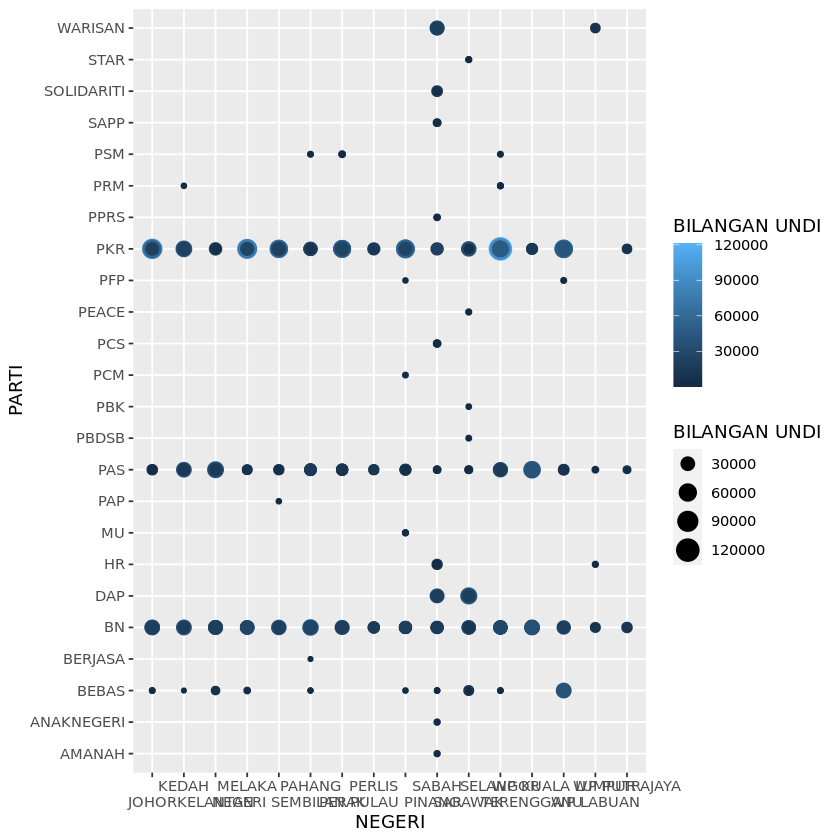

In [7]:
#Create a dot plot 
p<-ggplot(Result,aes(NEGERI,PARTI, color=`BILANGAN UNDI`))
p+geom_point(aes(size=`BILANGAN UNDI`))+
       scale_x_discrete(labels=function(labels){fixedLabels<-c()
       for (l in 1:length(labels))
             {fixedLabels[l]<-paste0(ifelse(l%%2==0,'','\n'),labels[l])}
       return(fixedLabels)})

In [8]:
#Import the data
Kaumpop<- read_csv("/home/jovyan/Data csv/KAUMPOP.csv")

Rows: 222 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): KAWASAN, BAHAGIAN PILIHAN RAYA
dbl (13): Melayu, Cina, India, Sabah, Sarawak, Orang Asli, Lain2, Kerajaan, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
#See how the data look like
head(Kaumpop)

KAWASAN,BAHAGIAN PILIHAN RAYA,Melayu,Cina,India,Sabah,Sarawak,Orang Asli,Lain2,Kerajaan,PKR,PAS,LAIN-LAIN,BEBAS,BN
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
JOHOR,P. 140 - SEGAMAT,25502,23742,5580,155,175,51,133,18584,24060,2676,0,0,41.01
JOHOR,P. 141 - SEKIJANG,27117,16648,1812,13,23,81,169,18278,19559,0,0,0,48.31
JOHOR,P. 142 - LABIS,15356,18172,5968,27,19,828,99,13301,16709,2020,0,0,41.53
JOHOR,P. 143 - PAGOH,34096,15433,1928,22,19,175,81,16631,23558,2483,0,0,38.97
JOHOR,P. 144 - LEDANG,43992,30392,3598,49,30,275,157,26040,34706,4668,0,0,39.81
JOHOR,P. 145 - BAKRI,32830,39503,1593,58,57,2,238,15507,38718,7575,0,0,25.09


In [10]:
#Create new variable (proportion by ethnic against the number of BN vote based on respective region) 
#Store in data frame called Population 
jum.BN<-rowSums(Kaumpop[,c("Melayu","Cina","India",
                 "Sabah","Sarawak","Orang Asli","Lain2")])
kadar.melayu<-rowSums(Kaumpop[,"Melayu"])/jum.BN
kadar.cina<-rowSums(Kaumpop[,"Cina"])/jum.BN
kadar.india<-rowSums(Kaumpop[,"India"])/jum.BN
kadar.sabah<-rowSums(Kaumpop[,"Sabah"])/jum.BN
kadar.sarawak<-rowSums(Kaumpop[,"Sarawak"])/jum.BN
kadar.orangasli<-rowSums(Kaumpop[,"Orang Asli"])/jum.BN
kadar.lain2<-rowSums(Kaumpop[,"Lain2"])/jum.BN

Population<-data.frame(Kaumpop,kadar.melayu,kadar.cina,kadar.india,kadar.sabah,kadar.sarawak,kadar.orangasli,kadar.lain2)

In [11]:
#See how the data look like
head(Population)

,KAWASAN,BAHAGIAN.PILIHAN.RAYA,Melayu,Cina,India,Sabah,Sarawak,Orang.Asli,Lain2,Kerajaan,⋯,LAIN.LAIN,BEBAS,BN,kadar.melayu,kadar.cina,kadar.india,kadar.sabah,kadar.sarawak,kadar.orangasli,kadar.lain2
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,JOHOR,P. 140 - SEGAMAT,25502,23742,5580,155,175,51,133,18584,⋯,0,0,41.01,0.4608407,0.4290361,0.10083487,0.0028009686,0.0031623839,9.216090e-04,0.002403412
2,JOHOR,P. 141 - SEKIJANG,27117,16648,1812,13,23,81,169,18278,⋯,0,0,48.31,0.5912609,0.3629941,0.03950897,0.0002834529,0.0005014936,1.766130e-03,0.003684888
3,JOHOR,P. 142 - LABIS,15356,18172,5968,27,19,828,99,13301,⋯,0,0,41.53,0.3794509,0.4490351,0.14747090,0.0006671773,0.0004694952,2.046011e-02,0.002446317
4,JOHOR,P. 143 - PAGOH,34096,15433,1928,22,19,175,81,16631,⋯,0,0,38.97,0.6588090,0.2981992,0.03725316,0.0004250879,0.0003671214,3.381381e-03,0.001565096
5,JOHOR,P. 144 - LEDANG,43992,30392,3598,49,30,275,157,26040,⋯,0,0,39.81,0.5604576,0.3871938,0.04583848,0.0006242595,0.0003821997,3.503497e-03,0.002000178
6,JOHOR,P. 145 - BAKRI,32830,39503,1593,58,57,2,238,15507,⋯,0,0,25.09,0.4419704,0.5318049,0.02144559,0.0007808188,0.0007673564,2.692479e-05,0.003204049


In [12]:
#Create a new variable, in which is used for value of y-axis 
Population$Perkadaran<-sample(0:1,222,replace=T)

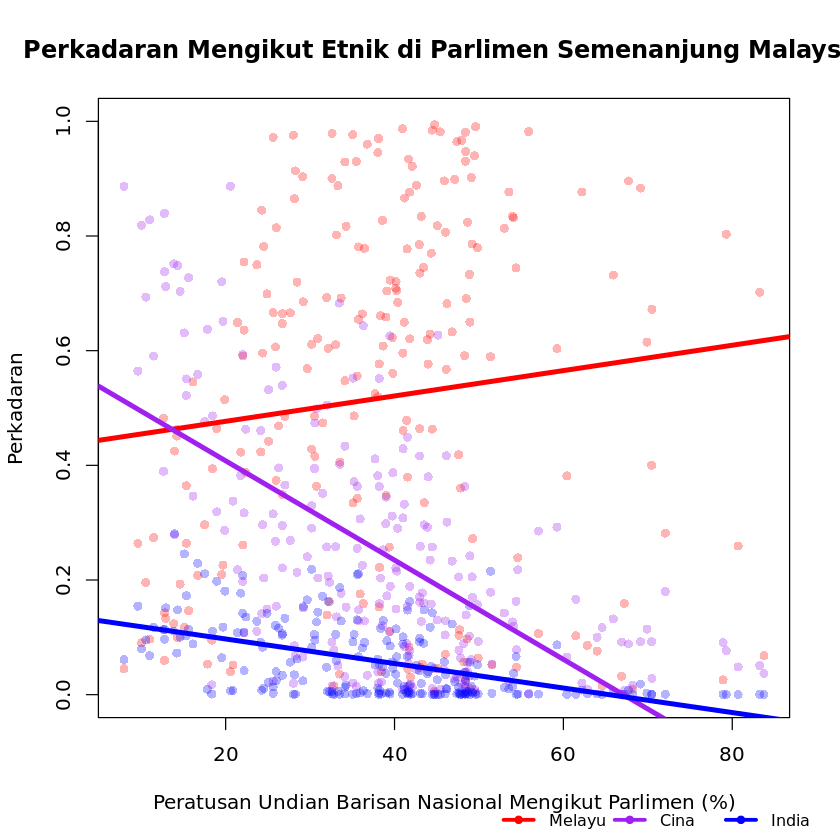

In [13]:
#Scatter plot and regression line of proportions by ethnicity in Peninsular Parliament
add_legend <- function(...) {
  opar <- par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), 
              mar=c(0, 0, 0, 0), new=TRUE)
  on.exit(par(opar))
  plot(0, 0, type='n', bty='n', xaxt='n', yaxt='n')
  legend(...)}

 with(Population,plot(BN,Perkadaran,col=alpha("red",0), pch=16,
                         main = "Perkadaran Mengikut Etnik di Parlimen Semenanjung Malaysia",
                         xlab = "Peratusan Undian Barisan Nasional Mengikut Parlimen (%)"))
 with(Population,points(BN,kadar.melayu,col=alpha("red",0.3), pch=16))
 with(Population,points(BN,kadar.cina, col=alpha("purple",0.3),pch=16))
 with(Population,points(BN,kadar.india, col=alpha("blue",0.3),pch=16))
 with(Population,abline(lm(kadar.melayu~BN), col="red",lwd=4))
 with(Population,abline(lm(kadar.cina~BN), col="purple",lwd=4))
 with(Population,abline(lm(kadar.india~BN), col="blue",lwd=4))
 add_legend(x="bottomright",legend=c("Melayu","Cina","India"),pch=20, 
            col=c("red","purple","blue"),
            horiz = T,bty='n',cex=0.8,lwd=3)

In [14]:
#Create new dataframe from Population data. Get the data from column 124 to 148
 data.ss<-Population[124:148,]

In [15]:
#Create a new variable, in which is used for value of y-axis 
data.ss$Perkadaran<-sample(0:1,25,replace=T)

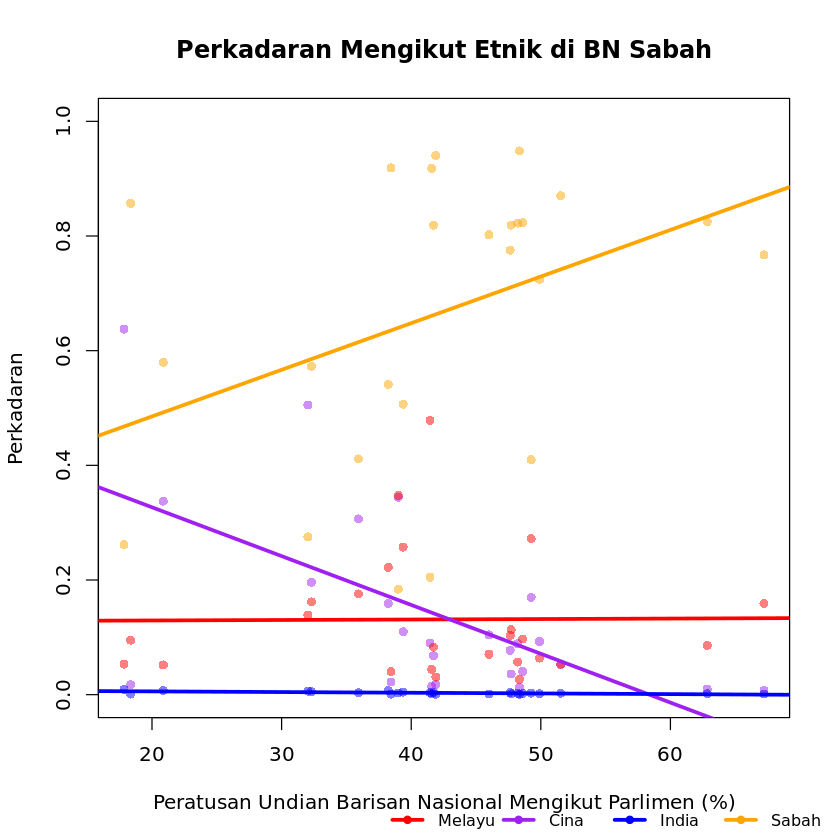

In [16]:
#Scatter plot and regression line of proportions by ethnicity in Sabah Parliament
add_legend <- function(...) {
   opar <- par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), 
               mar=c(0, 0, 0, 0), new=TRUE)
   on.exit(par(opar))
   plot(0, 0, type='n', bty='n', xaxt='n', yaxt='n')
   legend(...)}

 with(data.ss,plot(BN,Perkadaran, col=alpha("orange",0),pch=16,
                   main = "Perkadaran Mengikut Etnik di BN Sabah",
                   xlab = "Peratusan Undian Barisan Nasional Mengikut Parlimen (%)"))
 with(data.ss,points(BN,kadar.sabah, col=alpha("orange",0.5),pch=16))
 with(data.ss,points(BN,kadar.cina, col=alpha("purple",0.5),pch=16))
 with(data.ss,points(BN,kadar.india, col=alpha("blue",0.5),pch=16))
 with(data.ss,points(BN,kadar.melayu, col=alpha("red",0.5),pch=16))
 with(data.ss,abline(lm(kadar.melayu~BN), col="red",lwd=3))
 with(data.ss,abline(lm(kadar.cina~BN), col="purple",lwd=3))
 with(data.ss,abline(lm(kadar.india~BN), col="blue",lwd=3))
 with(data.ss,abline(lm(kadar.sabah~BN), col="orange",lwd=3))
 add_legend(x="bottomright",legend=c("Melayu","Cina","India","Sabah"),pch=20, 
            col=c("red","purple","blue","orange"),
            horiz = T,bty='n',cex=0.8,lwd=3 )

In [17]:
#Install library ggvis for visualization - Declaratively describe data graphics with a syntax similar in spirit to ggplot2
install.packages("ggvis")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [18]:
library(ggvis)


Attaching package: ‘ggvis’


The following object is masked _by_ ‘.GlobalEnv’:

    add_legend


The following object is masked from ‘package:ggplot2’:

    resolution




In [19]:
#Create new dataframe from Population data. Get the data from column 149 to 179
data.ssa<-Population[149:179,]

In [20]:
#Create a new variable, in which is used for value of y-axis 
data.ssa$Perkadaran<-sample(0:1,31,replace=T)

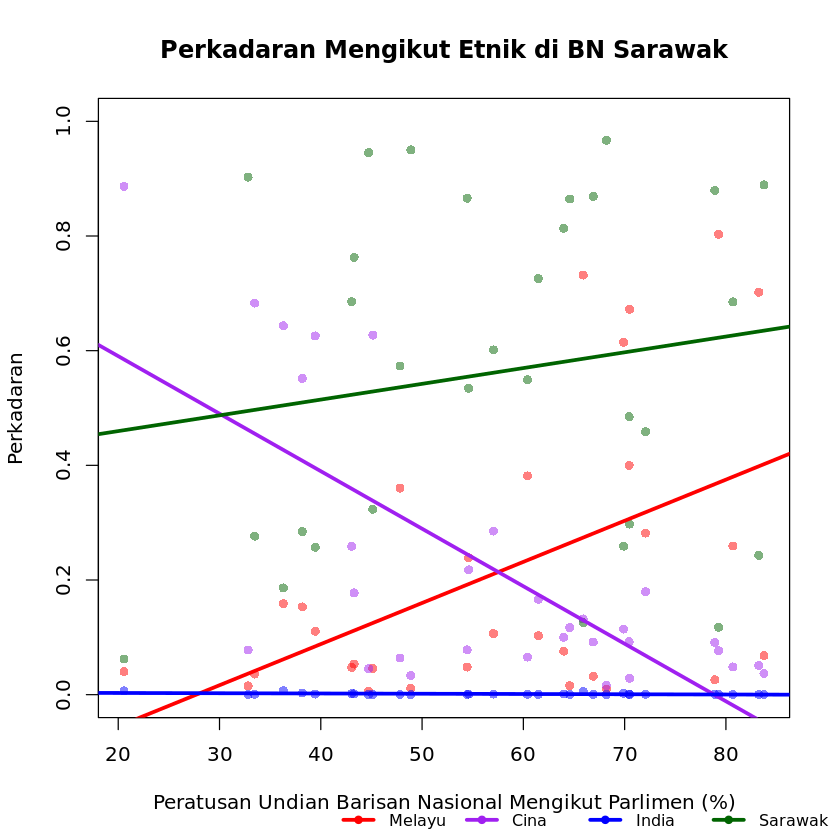

In [21]:
#Scatter plot and regression line of proportions by ethnicity in Sarawak Parliament
add_legend <- function(...) {
   opar <- par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), 
               mar=c(0, 0, 0, 0), new=TRUE)
   on.exit(par(opar))
   plot(0, 0, type='n', bty='n', xaxt='n', yaxt='n')
   legend(...)}

 with(data.ssa,plot(BN,Perkadaran, col=alpha("orange",0),pch=16,
                    main = "Perkadaran Mengikut Etnik di BN Sarawak",
                    xlab = "Peratusan Undian Barisan Nasional Mengikut Parlimen (%)"))
 with(data.ssa,points(BN,kadar.melayu, col=alpha("red",0.5),pch=16,))
 with(data.ssa,points(BN,kadar.cina, col=alpha("purple",0.5),pch=16))
 with(data.ssa,points(BN,kadar.india, col=alpha("blue",0.5),pch=16))
 with(data.ssa,points(BN,kadar.sarawak, col=alpha("dark green",0.5),pch=16))
 with(data.ssa,abline(lm(kadar.melayu~BN), col="red",lwd=3))
 with(data.ssa,abline(lm(kadar.cina~BN), col="purple",lwd=3))
 with(data.ssa,abline(lm(kadar.india~BN), col="blue",lwd=3))
 with(data.ssa,abline(lm(kadar.sarawak~BN), col="dark green",lwd=3))
# par(mar=c(5,4.1,4.1,0.2),xpd=T)
 add_legend(x="bottomright",legend=c("Melayu","Cina","India","Sarawak"),pch=20, 
        col=c("red","purple","blue","dark green"),
        horiz = T,bty='n',cex=0.8,lwd=3 )

In [22]:
#Install package leaflet
install.packages("leaflet")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [23]:
#Run the library leaflet for map plot
library(leaflet)

In [24]:
#Input the data
map <- read_csv("/home/jovyan/Data csv/Map.csv")

Rows: 54 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): KAWASAN, BAHAGIAN PILIHAN RAYA
dbl (2): latitude, longitude

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [25]:
#Map plot of felda parliment in Malaysia 
map %>% 
        leaflet() %>%
        addProviderTiles(providers$Esri.WorldImagery, group = "World Imagery") %>%
        addProviderTiles(providers$Stamen.TonerLite, group = "Toner Lite") %>%
        addLayersControl(baseGroups = c("Toner Lite", "World Imagery")) %>%
        addMarkers(label = map$`BAHAGIAN PILIHAN RAYA`)

Assuming "longitude" and "latitude" are longitude and latitude, respectively



HTML widgets cannot be represented in plain text (need html)

In [26]:
#Create a new data frame called donut with respective variable: Status, Jumlah, Peratus. 
Status<-c('Kalah','Menang')
Jumlah<-c(28,26)
Peratus<-c(51.85,48.15)
donut<-data.frame(Status,Jumlah,Peratus)

In [27]:
#See how the data look like
head(donut)

,Status,Jumlah,Peratus
,<chr>,<dbl>,<dbl>
1,Kalah,28,51.85
2,Menang,26,48.15


In [28]:
#Install library dplyr
install.packages("dplyr", dependency=T)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [29]:
#Run the library dplyr for visualization
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




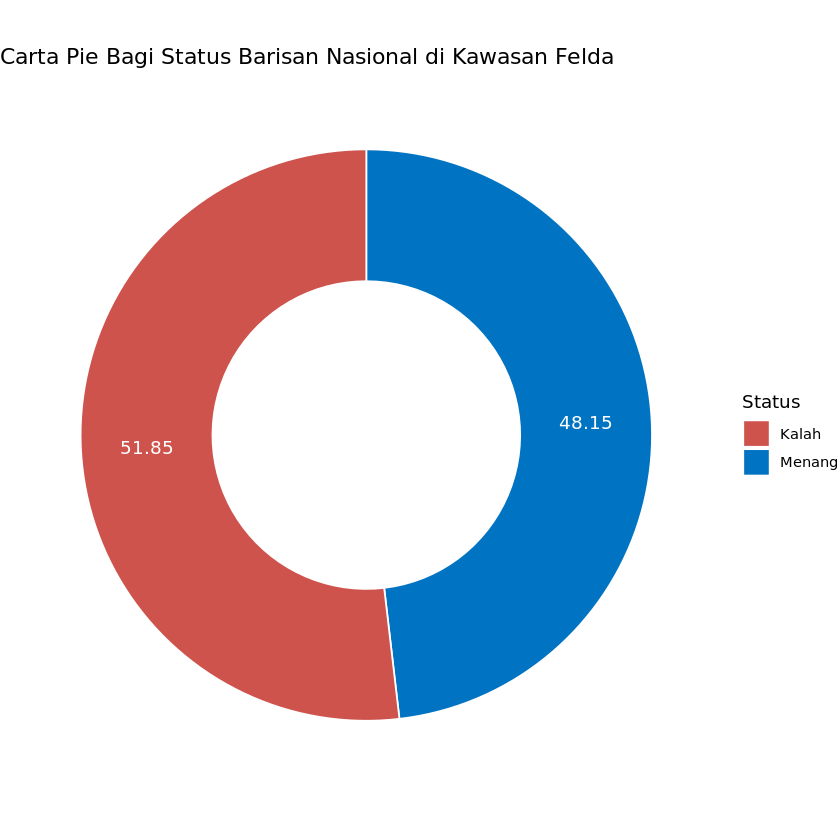

In [30]:
#Create a donut chart
donut<-donut%>%arrange(desc(Status))%>%mutate(lab.ypos=cumsum(Peratus)-0.5*Peratus)
mycols<-c("#CD534CFF","#0073C2FF")
  ggplot(donut,aes(x=2,y=Peratus,fill=Status))+
    geom_bar(stat="identity",color="white")+
    coord_polar(theta = "y",start=0)+
  geom_text(aes(y=lab.ypos,label=Peratus),color="white")+scale_fill_manual(values = mycols)+
    theme_void() +xlim(0.5,2.5)+ ggtitle("Carta Pie Bagi Status Barisan Nasional di Kawasan Felda ")
 

In [31]:
#Create a new data frame called donut1 with respective variable: Parti, Jumlah, Peratus.
Parti<-c('PH','PAS','WARISAN','BN')
Jumlah<-c(19,7,2,26)
Peratus<-c(35.19,12.96,3.70,48.15)
donut1<-data.frame(Parti,Jumlah,Peratus)

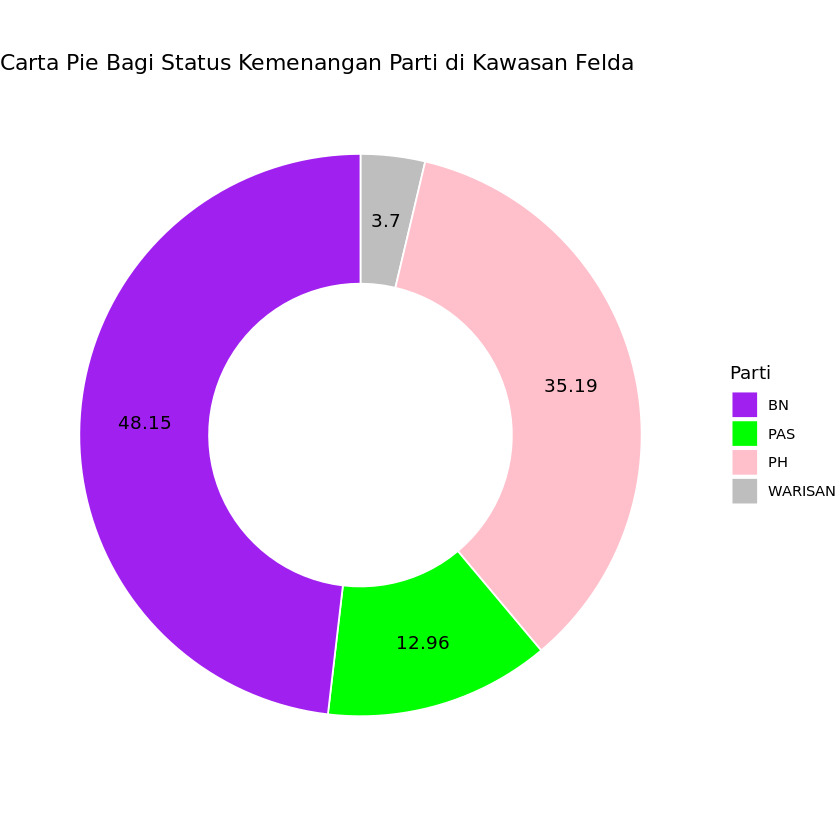

In [32]:
#Create a donut chart
donut1<-donut1%>%arrange(desc(Parti))%>%mutate(lab.ypos=cumsum(Peratus)-0.5*Peratus)
  mycols1<-c("purple","green","pink","grey")
  ggplot(donut1,aes(x=2,y=Peratus,fill=Parti))+
    geom_bar(stat="identity",color="white")+
    coord_polar(theta = "y",start=0)+
    geom_text(aes(y=lab.ypos,label=Peratus),color="black")+scale_fill_manual(values = mycols1)+
    theme_void() +xlim(0.5,2.5)+ ggtitle("Carta Pie Bagi Status Kemenangan Parti di Kawasan Felda ")

In [34]:
#Install library tidyverse
install.packages("tidyverse")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rematch’, ‘tinytex’, ‘xfun’, ‘backports’, ‘blob’, ‘DBI’, ‘data.table’, ‘gargle’, ‘cellranger’, ‘ids’, ‘rmarkdown’, ‘selectr’, ‘broom’, ‘dbplyr’, ‘dtplyr’, ‘forcats’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘lubridate’, ‘modelr’, ‘readxl’, ‘reprex’, ‘rvest’, ‘tidyr’




In [35]:
#Run the library tidyverse for visualization
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [37]:
#Input the data
band<- read_csv("/home/jovyan/Data csv/Bandar.csv")

Rows: 48 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Negeri, Keterbandaran
dbl (1): Jumlah

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [38]:
#See how the data look like
head(band)

Negeri,Keterbandaran,Jumlah
<chr>,<chr>,<dbl>
Johor,Luar bandar,16
Johor,Semi bandar,8
Johor,Bandar,2
Kedah,Luar bandar,9
Kedah,Semi bandar,5
Kedah,Bandar,1


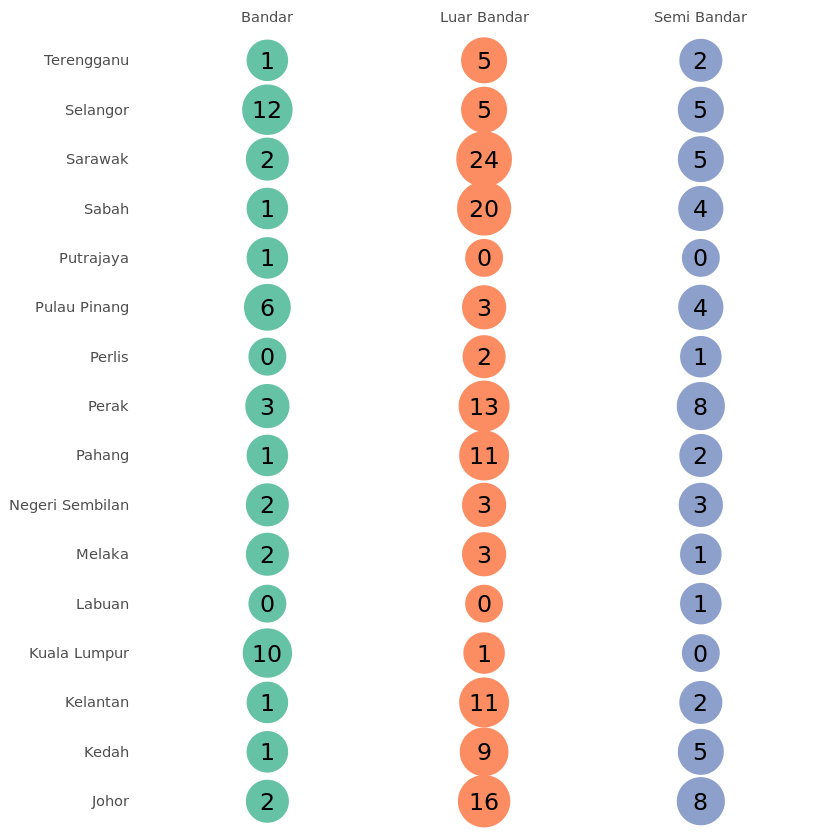

In [39]:
#Bubble grid chart of urbanization by state
offenses <- c("robbery", "violence", "drugs")
  actions <- c("formal", "informal", "considered")
  counts <- sample(10:100, 9, replace = TRUE)
  data <- expand.grid(offenses = offenses, actions = actions) %>% bind_cols(counts = counts)

ggplot(band,
         aes(x = str_to_title(Keterbandaran), 
             y = str_to_title(Negeri),
             colour = str_to_title(Keterbandaran),
             size = Jumlah)) +
    geom_point() +
    geom_text(aes(label = Jumlah), 
              colour = "black", 
              size = 5) +
    scale_x_discrete(position = "top") +
    scale_size_continuous(range = c(10, 15)) + # Adjust as required.
    scale_color_brewer(palette = "Set2") +
    labs(x = NULL, y = NULL) +
    theme(legend.position = "none",
          panel.background = element_blank(),
          panel.grid = element_blank(),
          axis.ticks = element_blank())
 

In [40]:
#Add package waffle to environment
install.packages("waffle")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’, ‘extrafont’




In [41]:
#Run the library waffle for visualization
library(waffle)

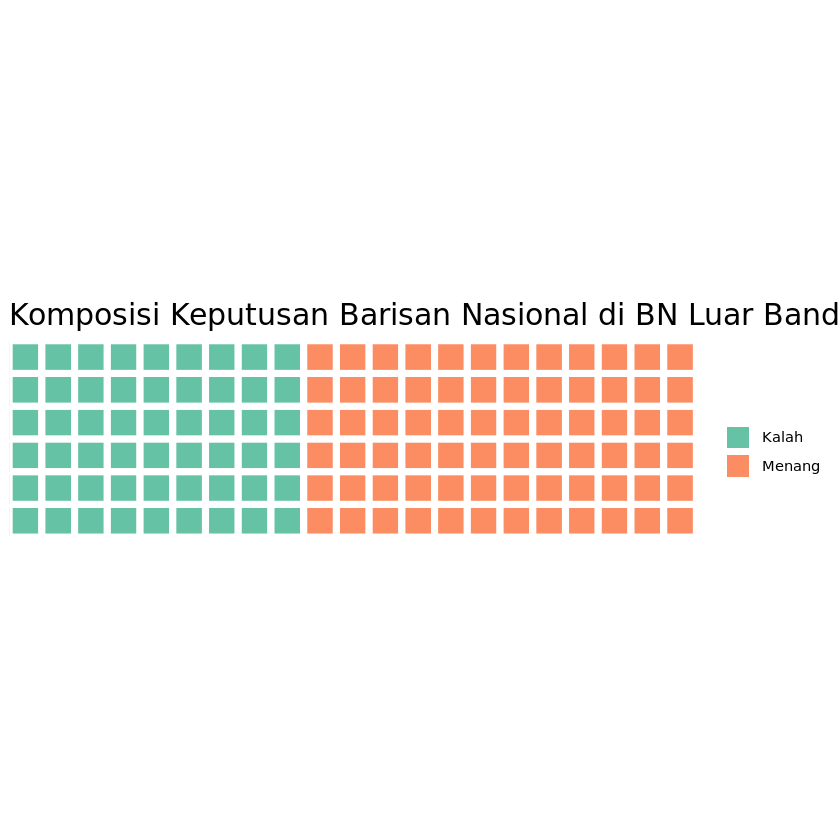

In [42]:
#Waffle chart of the composition of Barisan Nasional results in rural parliaments
waffle(c(Kalah=54,Menang=72),rows = 6, title="Komposisi Keputusan Barisan Nasional di BN Luar Bandar")

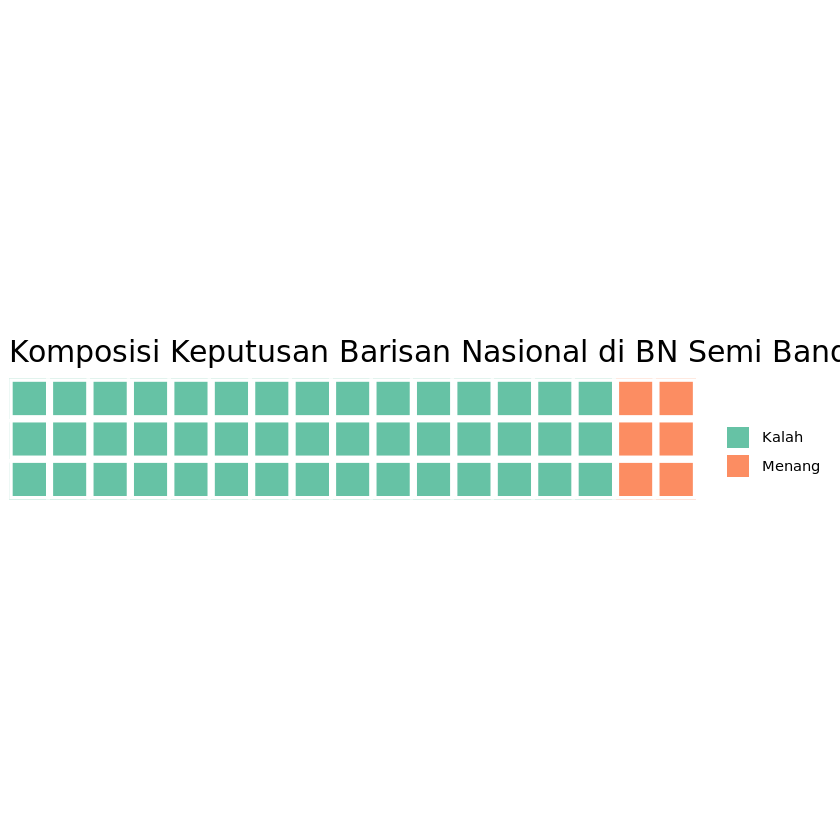

In [43]:
#Waffle chart of the composition of Barisan Nasional results in semi-urban parliaments
waffle(c(Kalah=45,Menang=6),rows = 3, title="Komposisi Keputusan Barisan Nasional di BN Semi Bandar")

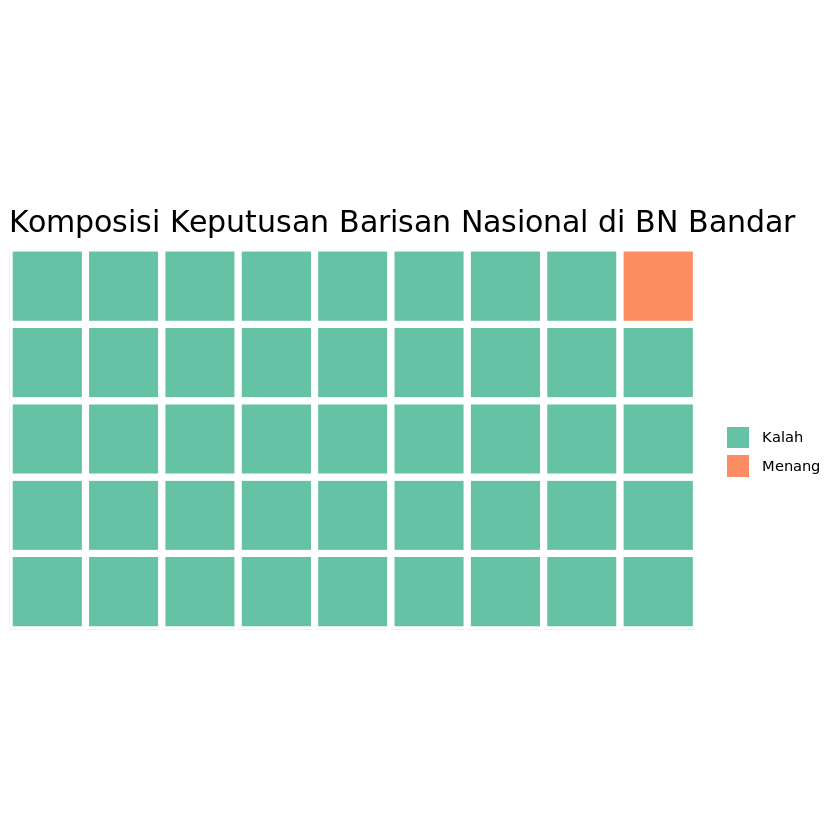

In [44]:
#Waffle chart of the composition of Barisan Nasional results in urban parliaments
waffle(c(Kalah=44,Menang=1),rows = 5, title="Komposisi Keputusan Barisan Nasional di BN Bandar")

In [46]:
#Import the data
mydata <- read_csv("/home/jovyan/Data csv/mydatalatest.csv")

Rows: 222 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): KAWASAN, BAHAGIAN PILIHAN RAYA
dbl (7): latitude, longitude, felda, luarbandar, zon, bumip, bn

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [47]:
#Convert the numeric into the qualitative variable
mydata$bn <-as.factor(mydata$bn)
mydata$felda <-as.factor(mydata$felda)
mydata$luarbandar <-as.factor(mydata$luarbandar)
mydata$zon <-as.factor(mydata$zon)
mydata$bumip <-as.factor(mydata$bumip)

In [48]:
#See the structure of the data
str(mydata)

spec_tbl_df [222 × 9] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ KAWASAN              : chr [1:222] "JOHOR" "JOHOR" "JOHOR" "JOHOR" ...
 $ BAHAGIAN PILIHAN RAYA: chr [1:222] "P. 140 - SEGAMAT" "P. 141 - SEKIJANG" "P. 142 - LABIS" "P. 143 - PAGOH" ...
 $ latitude             : num [1:222] 2.5 2.56 2.38 2.15 2.34 ...
 $ longitude            : num [1:222] 103 103 103 103 103 ...
 $ felda                : Factor w/ 2 levels "0","1": 2 2 2 2 2 1 1 1 1 1 ...
 $ luarbandar           : Factor w/ 3 levels "0","1","2": 1 1 1 1 1 2 2 1 1 1 ...
 $ zon                  : Factor w/ 5 levels "0","1","2","3",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ bumip                : Factor w/ 2 levels "0","1": 1 2 1 2 2 1 2 2 2 2 ...
 $ bn                   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 1 1 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   KAWASAN = col_character(),
  ..   `BAHAGIAN PILIHAN RAYA` = col_character(),
  ..   latitude = col_double(),
  ..   longitude = col_double(),
  ..   felda = col_double(),
  ..   

In [49]:
#See how the data look like
head(mydata)

KAWASAN,BAHAGIAN PILIHAN RAYA,latitude,longitude,felda,luarbandar,zon,bumip,bn
<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
JOHOR,P. 140 - SEGAMAT,2.5035,102.8208,1,0,3,0,1
JOHOR,P. 141 - SEKIJANG,2.5601,102.9312,1,0,3,1,1
JOHOR,P. 142 - LABIS,2.3823,103.0201,1,0,3,0,1
JOHOR,P. 143 - PAGOH,2.1492,102.7722,1,0,3,1,1
JOHOR,P. 144 - LEDANG,2.3434,102.5987,1,0,3,1,1
JOHOR,P. 145 - BAKRI,NA,NA,0,1,3,0,1


In [50]:
#Run the library nnet for modelling
library(nnet)

In [57]:
#Modelling the data using logistic regression
#Model with all independent variable
mymodel<-glm(bn~felda+luarbandar+bumip, data=mydata, family = binomial)

In [58]:
#Get the summary of the model
summary(mymodel)


Call:
glm(formula = bn ~ felda + luarbandar + bumip, family = binomial, 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6947  -1.0260   0.2318   0.5248   1.3367  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.04643    0.44245  -0.105 0.916425    
felda1       0.09165    0.35790   0.256 0.797898    
luarbandar1  2.28004    0.47830   4.767 1.87e-06 ***
luarbandar2  3.97083    1.04968   3.783 0.000155 ***
bumip1      -0.32059    0.44472  -0.721 0.470976    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 289.04  on 221  degrees of freedom
Residual deviance: 218.03  on 217  degrees of freedom
AIC: 228.03

Number of Fisher Scoring iterations: 6


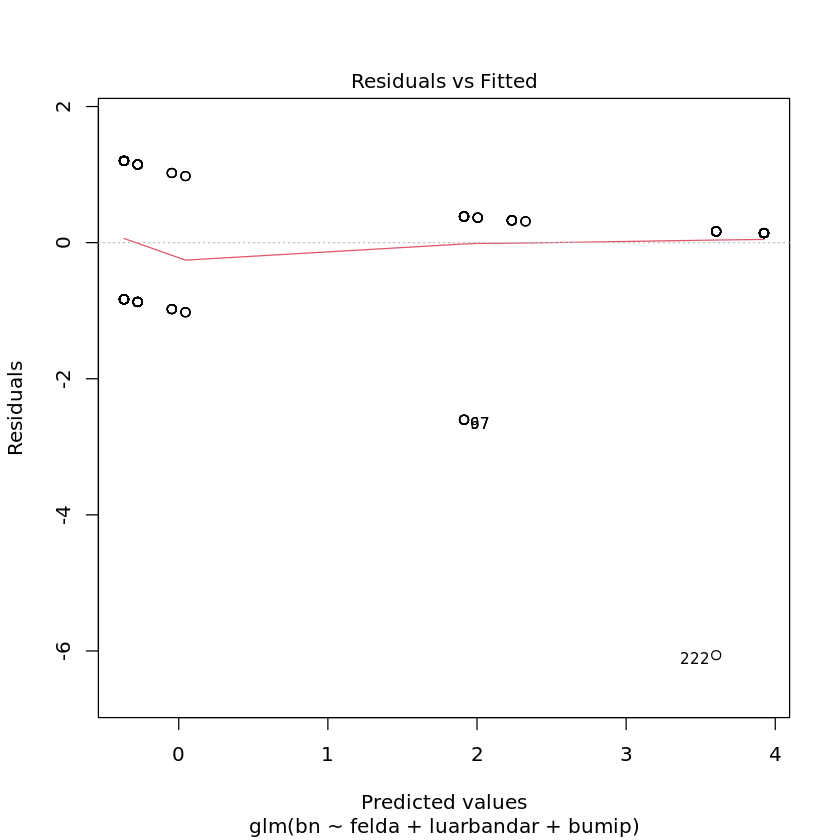

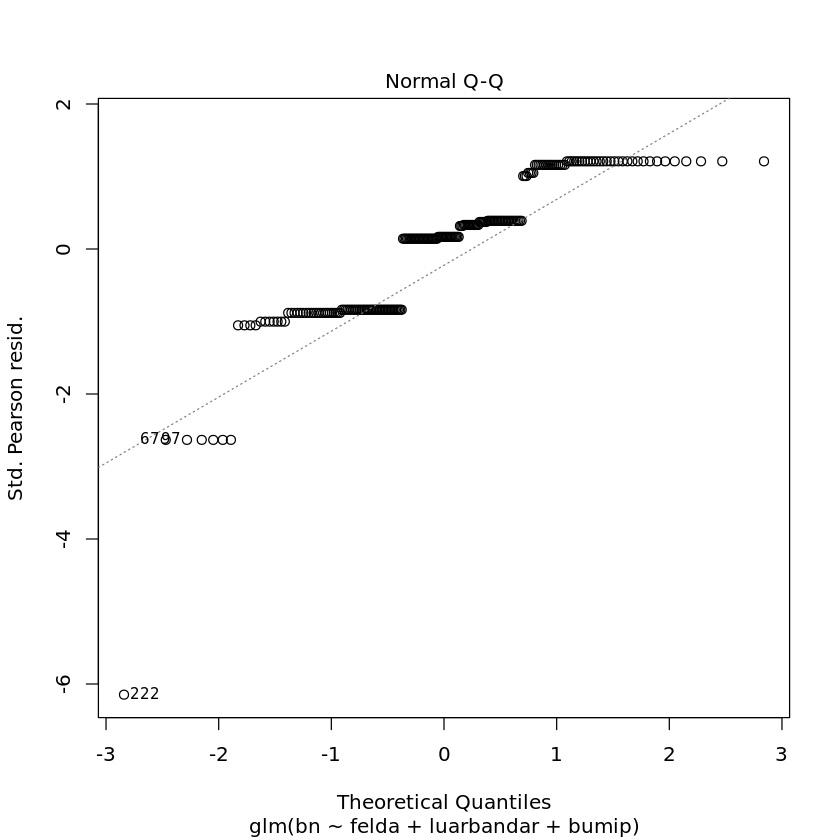

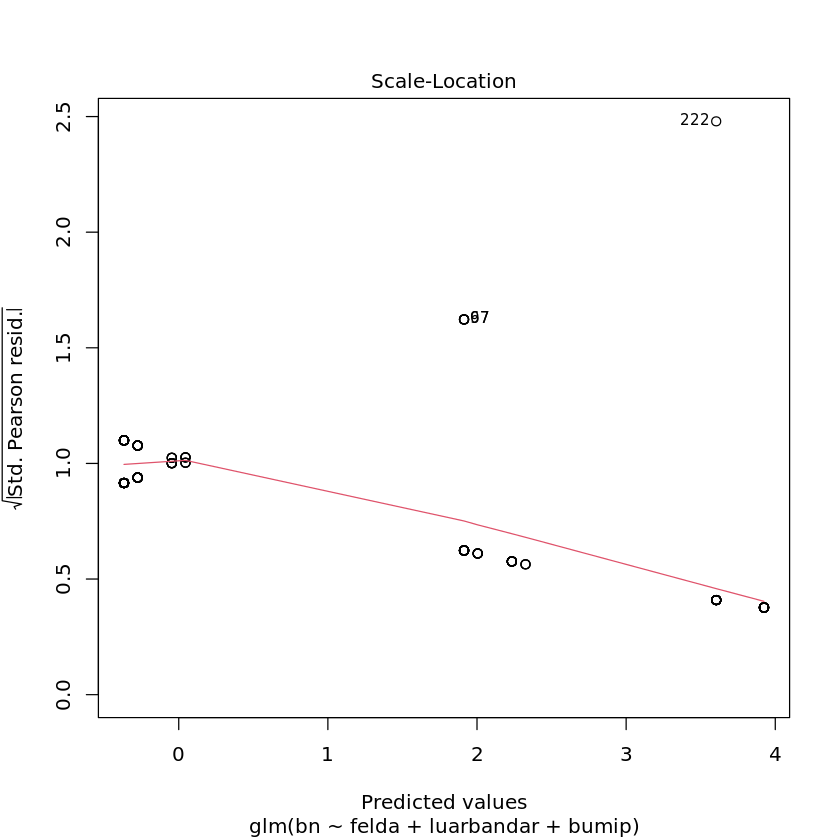

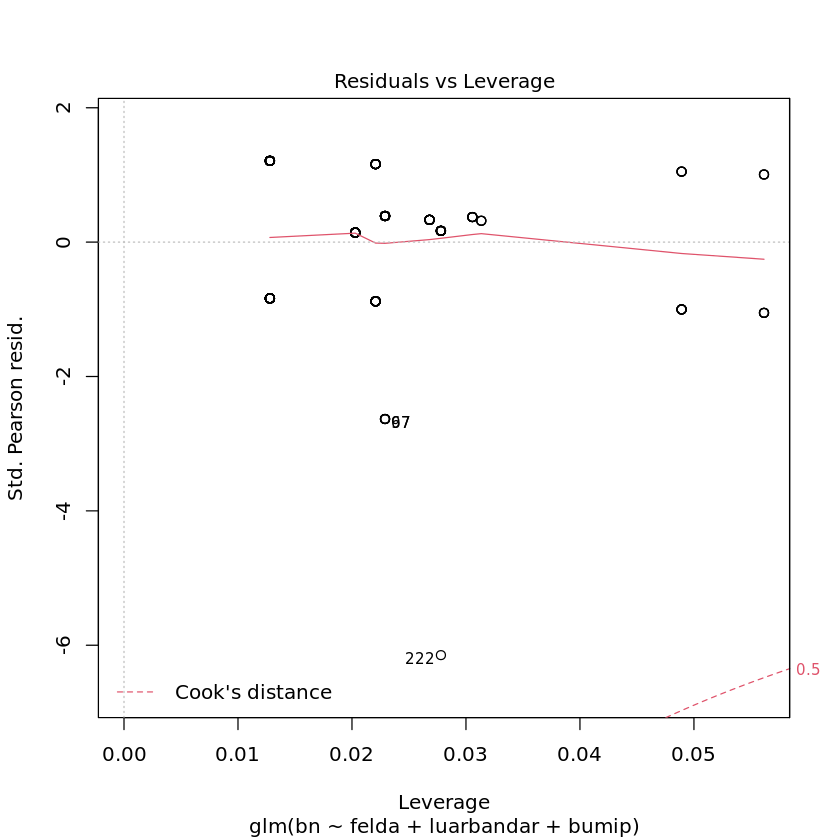

In [62]:
#Model adequacy check
plot(mymodel)